In [305]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

file = r'data.csv'
data = pd.read_csv(file, error_bad_lines=False)
df = pd.DataFrame(data)

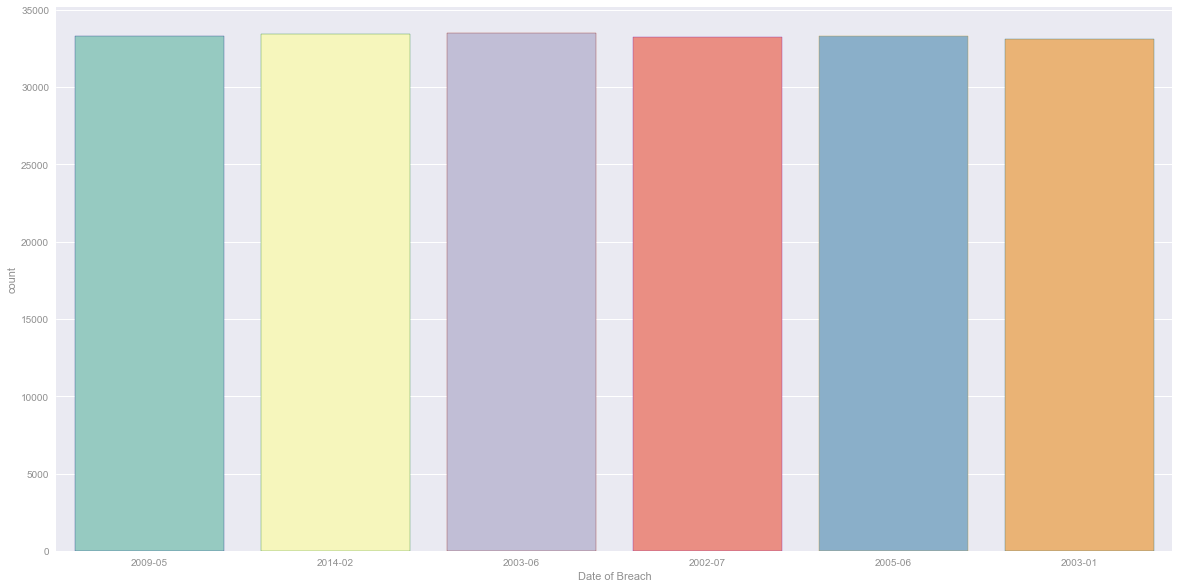

In [306]:
df['Year of Breach'] = df['Date of Breach'].apply(lambda date: date.split('-')[0])

plt.figure(figsize=(20,10))
sns.countplot(x='Date of Breach', data=data, palette="Set3", edgecolor=sns.color_palette("dark"))

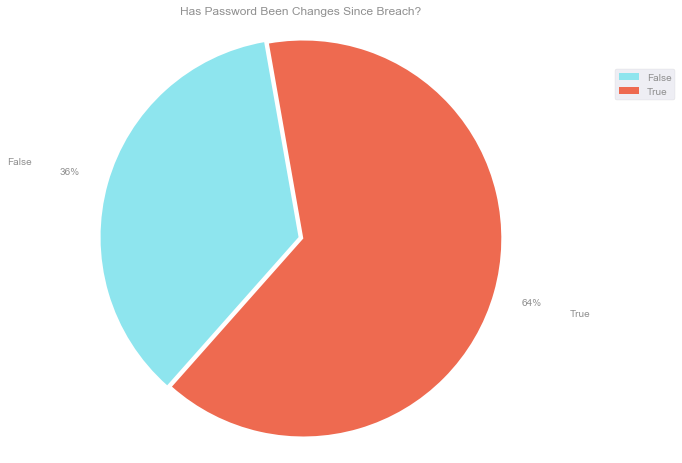

In [302]:
df['Changed Since Breach'] = df['Date of Most Recent Password Change'] > df['Date of Breach']

fig, ax = plt.subplots(figsize=(8,8))

data = df.groupby(['Changed Since Breach']).count().reset_index()

labels = data['Changed Since Breach']
data = list(data['First'])

colors = ['#8EE5EE', '#EE6A50']

percentages = [91, 9]
explode=(0.025,0.0)

ax.pie(data,explode=explode,labels=labels,colors=colors,autopct='%1.0f%%',
       shadow=False,pctdistance=1.2,labeldistance=1.4,startangle=100)

ax.axis('equal')
ax.set_title("Has Password Been Changes Since Breach?")
ax.legend(frameon=True, bbox_to_anchor=(1.35,0.9))

plt.show()

In [294]:
df2 = df.groupby(['State Code']).count().reset_index()

data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = df2['State Code'],
            z = df2['First'],
            locationmode = 'USA-states',
            text = df2['State Code'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Lost Account by State"}
            )

In [295]:
layout = dict(title = '2012 General Election Voting Data',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [296]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'file:///Users/Home/Documents/GitHub/data-breach-gen/data-breach/fake-breach-data/temp-plot.html'

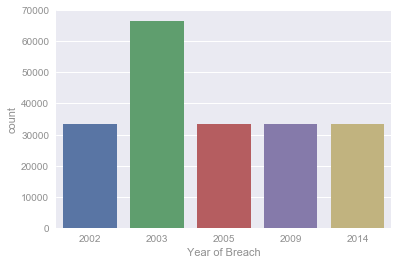

In [307]:
sns.countplot(x='Year of Breach', data=data)